<a href="https://colab.research.google.com/github/fatasa/PraktikumML/blob/main/PraktikumML30822.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import tensorflow as tf

In [14]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2022-08-30 10:23:50--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 205.185.216.10, 205.185.216.42
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|205.185.216.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   169MB/s    in 0.4s    

2022-08-30 10:23:51 (169 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [15]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [16]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [17]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(
        train_dir, # direktori data latih
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [22]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [23]:
# latih model dengan model.fit
model.fit(
      train_generator,
      steps_per_epoch=25, # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5, # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 15s - loss: 0.7401 - accuracy: 0.4900 - val_loss: 0.6887 - val_accuracy: 0.5000 - 15s/epoch - 593ms/step
Epoch 2/20
25/25 - 13s - loss: 0.6835 - accuracy: 0.4900 - val_loss: 0.6921 - val_accuracy: 0.5500 - 13s/epoch - 508ms/step
Epoch 3/20
25/25 - 13s - loss: 0.6969 - accuracy: 0.5200 - val_loss: 0.6885 - val_accuracy: 0.5000 - 13s/epoch - 506ms/step
Epoch 4/20
25/25 - 13s - loss: 0.6888 - accuracy: 0.5000 - val_loss: 0.6867 - val_accuracy: 0.7000 - 13s/epoch - 503ms/step
Epoch 5/20
25/25 - 13s - loss: 0.6959 - accuracy: 0.4900 - val_loss: 0.6926 - val_accuracy: 0.5000 - 13s/epoch - 504ms/step
Epoch 6/20
25/25 - 12s - loss: 0.6917 - accuracy: 0.5000 - val_loss: 0.6641 - val_accuracy: 0.5000 - 12s/epoch - 494ms/step
Epoch 7/20
25/25 - 12s - loss: 0.6521 - accuracy: 0.5900 - val_loss: 0.6787 - val_accuracy: 0.6500 - 12s/epoch - 499ms/step
Epoch 8/20
25/25 - 12s - loss: 0.6816 - accuracy: 0.6700 - val_loss: 0.7043 - val_accuracy: 0.5000 - 12s/epoch - 490ms/step
Epoch 9/

Saving Desain-Kamar-Tidur-Nyaman-Hangat.jpg to Desain-Kamar-Tidur-Nyaman-Hangat (1).jpg
Desain-Kamar-Tidur-Nyaman-Hangat.jpg
messy


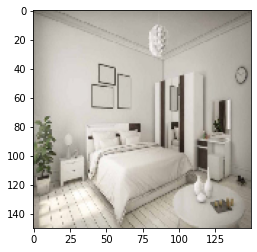

In [24]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
    print('messy')
  else:
    print('clean')